In [64]:
import pandas as pd 
import numpy as np
import thinkstats2
import thinkplot
import inspect
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
def magical_way(f):
    return inspect.getargspec(f)[0]

First I had to change the directory so that I could import the data

In [65]:
cd /users/bk997e/Documents/Homework/SchoolProject

C:\users\bk997e\Documents\Homework\SchoolProject


Now we will import our fish market data and take a preview of it 

In [3]:
Fish = pd.read_csv("Fish-market.csv")
Fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Now we will take a look at at the histogram of our variables along with their mean, mode, variance, and standard deviation of the ones that we could view.

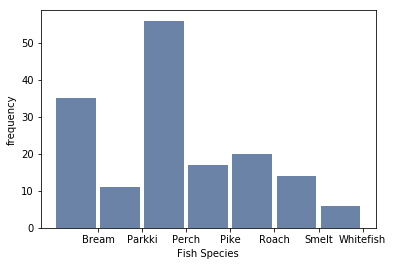

In [103]:
thinkplot.Hist(Specieshist)
thinkplot.Config(xlabel='Fish Species', ylabel='frequency')

The mean is  398.3264150943396
The mode is  0    300.0
dtype: float64
The variance is 128148.47512061145
The standard deviation is  357.9783165508931


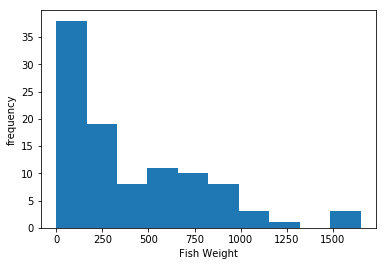

In [106]:
print("The mean is ",Fish.Weight.mean())
print("The mode is ", Fish.Weight.mode())
print("The variance is", Fish.Weight.var())
print("The standard deviation is ", Fish.Weight.std())
Weighthist = thinkstats2.Hist(Fish.Weight)
plt.hist(Weighthist)
#thinkplot.Hist(Weighthist, width=8)
thinkplot.Config(xlabel='Fish Weight', ylabel='frequency')

The mean is  26.24716981132075
The mode is  0    19.0
dtype: float64
The variance is 99.92883687604487
The standard deviation is  9.996441210553128


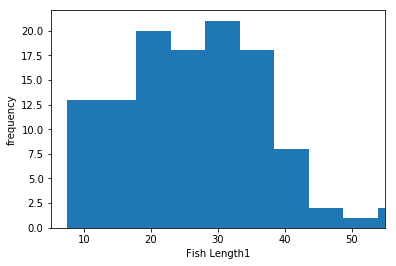

In [107]:
print("The mean is ",Fish.Length1.mean())
print("The mode is ", Fish.Length1.mode())
print("The variance is", Fish.Length1.var())
print("The standard deviation is ", Fish.Length1.std())
Length1hist = thinkstats2.Hist(Fish.Length1)
plt.hist(Length1hist)
thinkplot.Config(xlabel='Fish Length1', xlim=[5,55], ylabel='frequency')

The mean is  28.415723270440253
The mode is  0    22.0
dtype: float64
The variance is 114.83968792293608
The standard deviation is  10.716328098884247


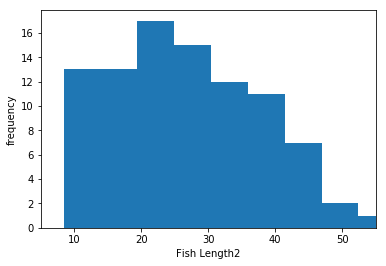

In [105]:
print("The mean is ",Fish.Length2.mean())
print("The mode is ", Fish.Length2.mode())
print("The variance is", Fish.Length2.var())
print("The standard deviation is ", Fish.Length2.std())
Length2hist = thinkstats2.Hist(Fish.Length2)
plt.hist(Length2hist)
thinkplot.Config(xlabel='Fish Length2', xlim=[5,55], ylabel='frequency')

The mean is  31.227044025157248
The mode is  0    23.5
dtype: float64
The variance is 134.79780829551788
The standard deviation is  11.610245832690964


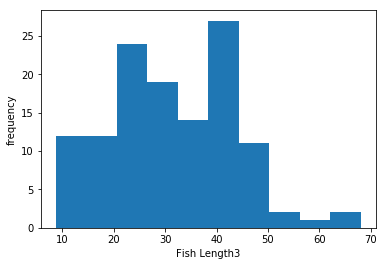

In [106]:
print("The mean is ",Fish.Length3.mean())
print("The mode is ", Fish.Length3.mode())
print("The variance is", Fish.Length3.var())
print("The standard deviation is ", Fish.Length3.std())
Length3hist = thinkstats2.Hist(Fish.Length3)
plt.hist(Length3hist)
thinkplot.Config(xlabel='Fish Length3', ylabel='frequency')

The mean is  8.970993710691822
The mode is  0     2.2139
1     5.6925
2     6.1100
3     9.6000
4    11.1366
dtype: float64
The variance is 18.371575761479175
The standard deviation is  4.286207619968867


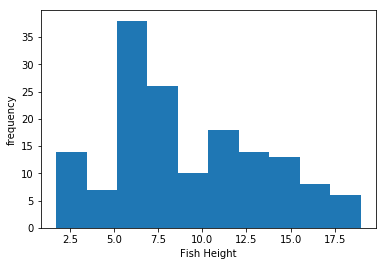

In [108]:
print("The mean is ",Fish.Height.mean())
print("The mode is ", Fish.Height.mode())
print("The variance is", Fish.Height.var())
print("The standard deviation is ", Fish.Height.std())
Heighthist = thinkstats2.Hist(Fish.Height)
plt.hist(Heighthist)
thinkplot.Config(xlabel='Fish Height', ylabel='frequency')

The mean is  4.417485534591194
The mode is  0    3.525
dtype: float64
The variance is 2.8419346880805683
The standard deviation is  1.6858038699921674


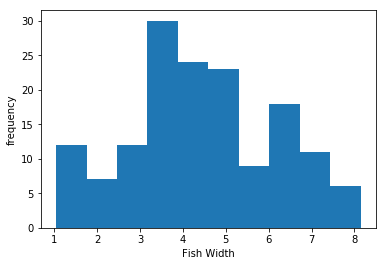

In [104]:
print("The mean is ",Fish.Width.mean())
print("The mode is ", Fish.Width.mode())
print("The variance is", Fish.Width.var())
print("The standard deviation is ", Fish.Width.std())
Widthhist = thinkstats2.Hist(Fish.Width)
plt.hist(Widthhist)
thinkplot.Config(xlabel='Fish Width', ylabel='frequency')

Now lets take a look at the PMF of the fish species and plot it

Pmf({'Perch': 0.35220125786163525, 'Bream': 0.22012578616352202, 'Roach': 0.12578616352201258, 'Pike': 0.1069182389937107, 'Smelt': 0.08805031446540881, 'Parkki': 0.06918238993710692, 'Whitefish': 0.03773584905660378}, 'Fish Species')

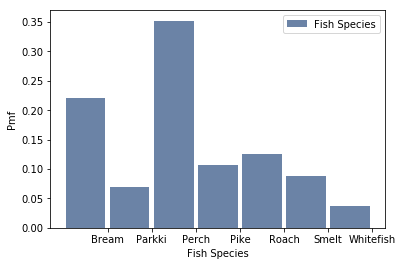

In [136]:
pmf = thinkstats2.Pmf(Fish.Species, label='Fish Species')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Fish Species', ylabel='Pmf')
pmf

Here we will look at the CDF of the fish's weight and plot it with normal distribution.

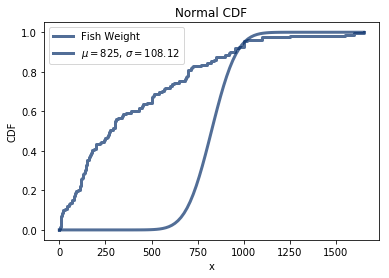

In [58]:
cdf=thinkstats2.Cdf(Fish.Weight, label='Fish Weight')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Fish Weight', ylabel='CDF')
thinkplot.PrePlot(3)

mus = [(min(Fish.Weight)+max(Fish.Weight))/2]
sigmas = [0.68*len(Fish.Weight)]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-min(Fish.Weight), high=max(Fish.Weight))
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')
#cdf

The CDF normal distrubtion shows that the Fish weights are not normally distributed. This could be due to the fact that there are so many species of fish, and 90% of them weigh less that 1000 for example.

Now we will take a look at two scatter plots one with Length1 and Weight. The other scatter plot will be of the Width and Height. we will also and also their covariance and correlation

This is the covariance between length1 and weight 3256.273470986116
This is the correlation between length1 and weight 0.9157117160312038


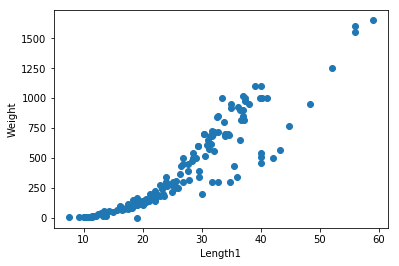

In [82]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

plt.scatter(Fish.Length1, Fish.Weight, alpha=1)
plt.xlabel('Length1')
plt.ylabel('Weight')
cov=Cov(Fish.Length1, Fish.Weight)
corr=Corr(Fish.Length1, Fish.Weight)
print('This is the covariance between length1 and weight', cov)
print('This is the correlation between length1 and weight', corr)

This is the covariance between Height and Width 5.693092412424745
This is the correlation between Height and Width 0.7928810172871046


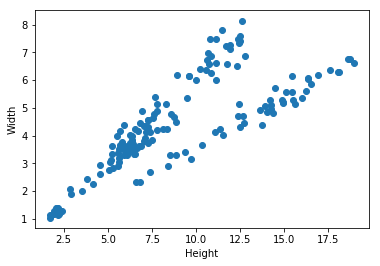

In [110]:
plt.scatter(Fish.Height, Fish.Width, alpha=1)
plt.xlabel('Height')
plt.ylabel('Width')
cov=Cov(Fish.Height, Fish.Width)
corr=Corr(Fish.Height, Fish.Width)
print('This is the covariance between Height and Width', cov)
print('This is the correlation between Height and Width', corr)

Here we will import our class to perform the hypothesis test

In [91]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Now we will begin the necessary steps to perform a hypothesis test on the fish weight

In [84]:
from sklearn.model_selection import train_test_split

x=Fish.Weight

In [86]:
x_train, x_test = train_test_split(x, test_size=0.2)

In [93]:
x_train.head()

26     720.0
44     145.0
53     272.0
139    770.0
45     160.0
Name: Weight, dtype: float64

In [94]:
x_test.head()

95     170.0
16     700.0
71     300.0
76      70.0
105    250.0
Name: Weight, dtype: float64

Here are the values from our hypothesis test

In [92]:
data = x_train.dropna().values, x_test.dropna().values
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())

p-value = 0.83
actual = 12.46277066929133
ts max = 181.70580708661424


Here we will look at regression weight as a factor of species

In [96]:
import statsmodels.formula.api as smf

formula = 'Weight ~ Species'
model = smf.ols(formula, data=Fish)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     14.95
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           2.11e-13
Time:                        22:14:04   Log-Likelihood:                -1123.2
No. Observations:                 159   AIC:                             2260.
Df Residuals:                     152   BIC:                             2282.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              617.8286     48.921     12.629      0.000     521.175     714.482
Species[T.Parkki]     -463.0104    100.042     -4.628      0.000    -660.663    -265.358
Species[T.Perch]      -235.5893     62.363     -3.778      0.000    -358.799    -112.379
Species[T.Pike]        100.8773     85.561      1.179      0.240     -68.165     269.920
Species[T.Roach]      -465.7786     81.127     -5.741      0.000    -626.061    -305.496
Species[T.Smelt]      -606.6500     91.524     -6.628      0.000    -787.473    -425.827
Species[T.Whitefish]   -86.8286    127.884     -0.679      0.498    -339.488     165.831
==============================================================================
Omnibus:                       26.957   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.653
Skew:                           1.050   Prob(JB):                     2.99e-08
Kurtosis:                       3.906   Cond. No.                         7.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""